Image Approximation with Orthogonal Bases
=========================================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This numerical tour uses several orthogonal bases to perform non-linear image
approximation.

In [2]:
using PyPlot
using NtToolBox


Best $M$-terms Non-linear Approximation
-----------------------------------------
This tours makes use of an orthogonal base $ \Bb = \{ \psi_m \}_{m=0}^{N-1} $
of the space $\RR^N$ of the images with $N$ pixels.


The best $M$-term approximation of $f$ is obtained by a non-linear
thresholding

$$ f_M = \sum_{ \abs{\dotp{f}{\psi_m}}>T }  \dotp{f}{\psi_m} \psi_m, $$
where the value of $T>0$ should be carefully selected so that only
$M$ coefficients are not thresholded, i.e.

$$ \abs{ \enscond{m}{ \abs{\dotp{f}{\psi_m}}>T } } = M. $$


The goal is to use an ortho-basis $ \Bb $ so that the error $ \norm{f-f_M} $
decays as fast as possible when $M$ increases, for a large class of
images.


This tour studies several different orthogonal bases: Fourier, wavelets (which is at the heart of JPEG-2000),
cosine, local cosine (which is at the heart of JPEG).



First we load an image of $ N = n \times n $ pixels.

In [3]:
n = 512
f = rescale(load_image("nt_toolbox/data/lena.png", n))

512×512 Array{Float32,2}:
 0.672897  0.672897  0.672897  0.669782  …  0.705608  0.64486   0.528037
 0.672897  0.672897  0.672897  0.669782     0.705608  0.64486   0.528037
 0.672897  0.672897  0.672897  0.669782     0.705608  0.64486   0.528037
 0.672897  0.672897  0.672897  0.669782     0.705608  0.64486   0.528037
 0.672897  0.672897  0.672897  0.669782     0.705608  0.64486   0.528037
 0.682243  0.682243  0.658879  0.64486   …  0.514019  0.415888  0.291277
 0.668224  0.668224  0.67757   0.658879     0.303738  0.224299  0.196262
 0.663551  0.663551  0.64486   0.654206     0.149533  0.17757   0.135514
 0.64486   0.64486   0.658879  0.658879     0.126168  0.135514  0.14486 
 0.64486   0.64486   0.654206  0.658879     0.135514  0.126168  0.116822
 0.649533  0.649533  0.649533  0.668224  …  0.126168  0.154206  0.154206
 0.649533  0.649533  0.649533  0.663551     0.126168  0.121495  0.140187
 0.658879  0.658879  0.654206  0.649533     0.135514  0.140187  0.149533
 ⋮                       

Display it.

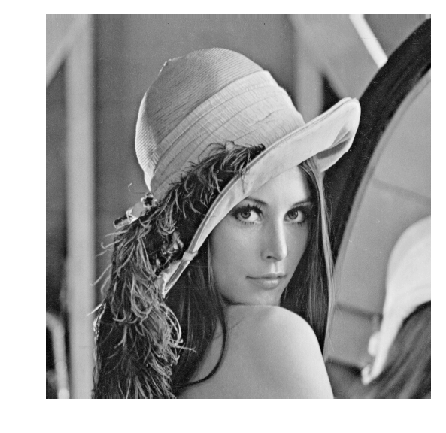

In [4]:
figure(figsize = (5,5))
imageplot(f)

Fourier Approximation
---------------------
The discrete 2-D Fourier atoms are defined as:
$$ \psi_m(x) = \frac{1}{\sqrt{N}} e^{ \frac{2i\pi}{n} ( x_1 m_1 + x_2 m_2 ) },  $$
where $ 0 \leq m_1,m_2 < n $ indexes the frequency.


The set of inner products $ \{ \dotp{f}{\psi_m} \}_m $ is computed in
$O(N \log(N))$ operations with the 2-D Fast Fourier Transform (FFT)
algorithm (the pylab function is fft2).


Compute the Fourier transform using the FFT algorithm.
Note the normalization by $1/\sqrt{N}$ to ensure orthogonality (energy
conservation) of the transform.

In [5]:
fF = (plan_fft(f)*f)/n

512×512 Array{Complex{Float32},2}:
    256.476+0.0im        -3.95615+20.4749im   …   -3.95615-20.4749im 
  0.0844855-11.1962im    -15.1921+13.9858im       0.630981+7.94724im 
   -3.55624-1.76501im    -2.36528-0.595752im       7.28666-0.598839im
    4.73903+1.55932im   -0.805839-5.27302im        6.26791-6.04117im 
  -0.624841-5.30147im     1.55698-1.17529im      -0.988565+0.720974im
   -1.61084-4.77705im    0.165628-1.66687im   …   -2.28491+1.02422im 
    1.22427-0.125188im   -2.10585-2.96785im        1.15793-2.06182im 
    2.86644-0.98837im   -0.248534+1.02317im       -0.55987-1.09585im 
  -0.569311-0.075523im   0.416833-0.219624im       1.58716-0.4015im  
   0.993204-1.84695im    -1.48726-0.244343im      -1.33509+0.742391im
 -0.0138412-0.112531im  -0.682093-1.73745im   …    1.08995-0.3994im  
    0.83187-1.05805im    0.247246+0.45962im       0.700845-0.604206im
  -0.225175+0.184748im  -0.398911-0.745511im       1.23564-0.586102im
           ⋮                                  ⋱        

Display its magnitude (in log scale).
We use the pylab function fftshift to put the low frequency in the center.

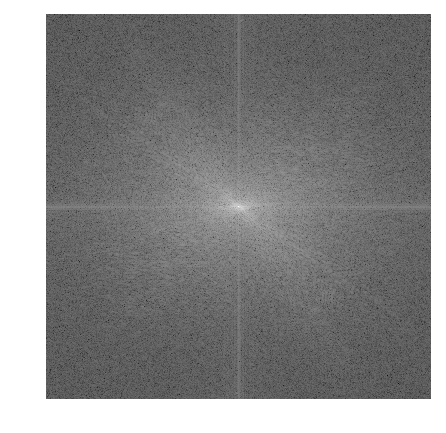

In [6]:
figure(figsize = (5,5))
imageplot(log(1e-5 + abs(fftshift(fF))))

An image is recovered from a set of coefficients $c_m$ using the inverse
Fourier Transform (pylab function ifft2)) that implements the formula

$$ f_M = \sum_m c_m \psi_m. $$

Perform a thresholding.

In [7]:
T = .3
c = fF.*(abs(fF) .> T)

512×512 Array{Complex{Float32},2}:
   256.476+0.0im        -3.95615+20.4749im   …   -3.95615-20.4749im 
 0.0844855-11.1962im    -15.1921+13.9858im       0.630981+7.94724im 
  -3.55624-1.76501im    -2.36528-0.595752im       7.28666-0.598839im
   4.73903+1.55932im   -0.805839-5.27302im        6.26791-6.04117im 
 -0.624841-5.30147im     1.55698-1.17529im      -0.988565+0.720974im
  -1.61084-4.77705im    0.165628-1.66687im   …   -2.28491+1.02422im 
   1.22427-0.125188im   -2.10585-2.96785im        1.15793-2.06182im 
   2.86644-0.98837im   -0.248534+1.02317im       -0.55987-1.09585im 
 -0.569311-0.075523im   0.416833-0.219624im       1.58716-0.4015im  
  0.993204-1.84695im    -1.48726-0.244343im      -1.33509+0.742391im
      -0.0-0.0im       -0.682093-1.73745im   …    1.08995-0.3994im  
   0.83187-1.05805im    0.247246+0.45962im       0.700845-0.604206im
      -0.0+0.0im       -0.398911-0.745511im       1.23564-0.586102im
          ⋮                                  ⋱                      

Inverse the Fourier transform.

In [8]:
fM = real((plan_ifft(c)*c)*n)

512×512 Array{Float32,2}:
 0.483716  0.447112  0.418023  0.396734  …  0.585784  0.562059  0.524727
 0.51758   0.488234  0.465988  0.451702     0.604017  0.582666  0.551245
 0.539193  0.521543  0.510711  0.507189     0.601224  0.584037  0.561614
 0.54883   0.547347  0.551568  0.560633     0.575548  0.56518   0.555555
 0.549028  0.56703   0.587815  0.608695     0.528842  0.528631  0.535878
 0.543316  0.581933  0.618134  0.647772  …  0.466492  0.479865  0.507471
 0.534777  0.592552  0.640765  0.67498      0.396211  0.425793  0.475666
 0.525114  0.598457  0.654222  0.689204     0.326193  0.372947  0.4447  
 0.514596  0.598928  0.658206  0.691695     0.263264  0.326025  0.416883
 0.50279   0.593895  0.654202  0.685873     0.211683  0.287318  0.392734
 0.489592  0.58462   0.645369  0.67632   …  0.172922  0.257102  0.371857
 0.475928  0.573684  0.635677  0.667361     0.14634   0.234615  0.35398 
 0.463739  0.564229  0.628635  0.661802     0.130261  0.219043  0.33957 
 ⋮                       

Display the approximation.

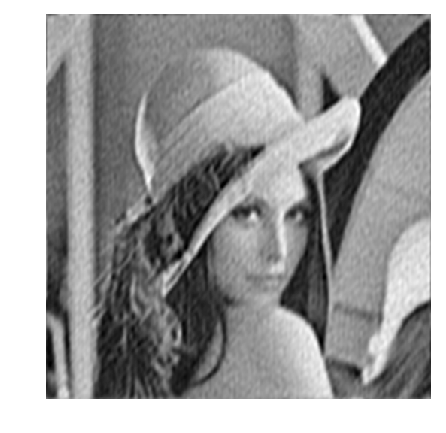

In [9]:
figure(figsize = (5,5))
imageplot(clamP(fM))

__Exercise 1__

Compute a best $M$-term approximation in the Fourier basis of $f$, for
$M \in \{N/100, N/20\}$. Compute the approximation using
a well chosen hard threshold value $T$.

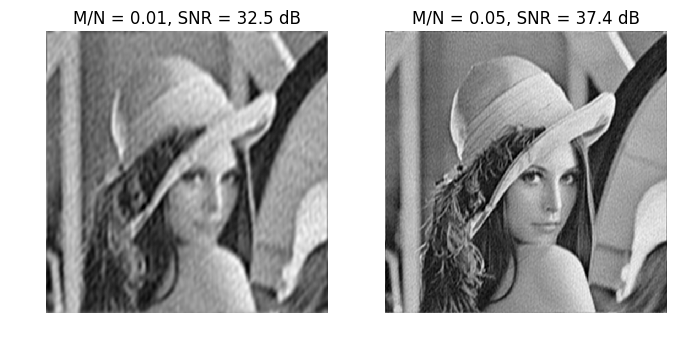

In [32]:
#run -i nt_solutions/coding_1_approximation/exo1
#include("coding_1_approximation\ exo1.jl")
include("Exos\\coding_1_approximation\\exo1.jl")

In [10]:
## Insert your code here.

The best $M$-term approximation error is computed using the
conservation of energy as

$$ \epsilon[M]^2 = \norm{f-f_M}^2 = \sum_{ \abs{\dotp{f}{\psi_m}} \leq T } \abs{\dotp{f}{\psi_m}}^2.  $$


If one denotes by $ \{ c_R[k] \}_{k=0}^{N-1} $ the set of
coefficients magnitudes $ \abs{\dotp{f}{\psi_m}} $ ordered by *decaying*
magnitudes, then this error is easily computed as
$$ \epsilon[M]^2 = \sum_{k=M}^{N-1} c_R[k]^2
    = \norm{f}^2 - \sum_{k=0}^{M-1} c_R[k]^2. $$
This means that $\epsilon^2$ is equal to
$\norm{f}^2$ minus the discrete primitive of $ c_R^2 $.

__Exercise 2__

Compute and display in log scales the ordered coefficients $c_R$.
_Hint:_ a discrete primitive can be computed using the numpy function cumsum.

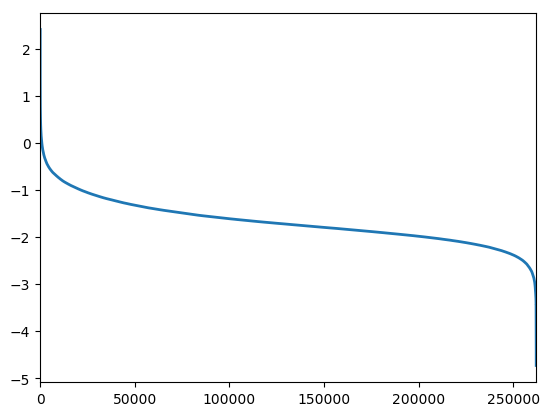

In [33]:
#run -i nt_solutions/coding_1_approximation/exo2
include("Exos\\coding_1_approximation\\exo2.jl")

In [12]:
## Insert your code here.

__Exercise 3__

Compute and display in log-scale the non-linear approximation
error $\epsilon[M]^2$.
Store the values of $\epsilon[M]^2$ in a vector $err\_fft$.

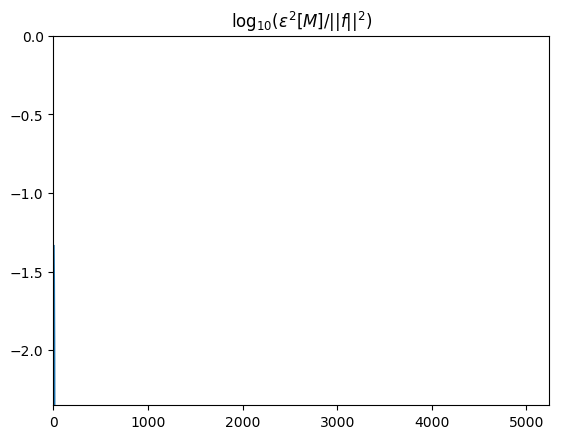

In [78]:
#run -i nt_solutions/coding_1_approximation/exo3
#include("Exos\\coding_1_approximation\\exo3.jl")

#norm(f)^2 - cumsum(cR.^2)
#collect(max(e, 1e-10) for e in (norm(f, Inf)^2 - cumsum(cR.^2)))

err_fft = collect(max(e, 1e-10) for e in (norm(f, 2)^2 - cumsum(cR.^2)))

log10(err_fft./norm(f)^2)[1:5000]
plot(log10(err_fft./norm(f)^2), linewidth = 2)
title(L"$\log_{10}(\epsilon^2[M]/ ||f||^2)$")
xlim(1, n^2/50)
ylim(-2.35, 0)

show()




In [14]:
## Insert your code here.

Wavelet Approximation
---------------------
The Wavelet basis of continuous 2-D functions is defined by
by scaling and translating three mother
atoms $ \{\psi^H,\psi^V,\psi^D\} $:
$$ \psi_{j,n}^k(x) = \frac{1}{2^j}\psi^k\pa{\frac{x-2^j n}{2^j}}  $$


Non-linear wavelet approximation is a the heart of the JPEG-2000
compression standard.


The set of inner products $ \{ \dotp{f}{\psi_m} \}_m $ is computed in
$O(N)$ operations with the 2-D Fast Wavelet Transform
algorithm.


Perform a wavelet transform.
Here we use a daubechies wavelet transform.

In [10]:

Jmin = 1

h = compute_wavelet_filter("Daubechies",10)

#fW = perform_wavortho_transf(f, Jmin, + 1, h) # à coder sur signal.jl

11-element Array{Float64,1}:
  0.0       
  0.160102  
  0.603829  
  0.724309  
  0.138428  
 -0.242295  
 -0.0322449 
  0.0775715 
 -0.00624149
 -0.0125808 
  0.00333573

Display the coefficients.

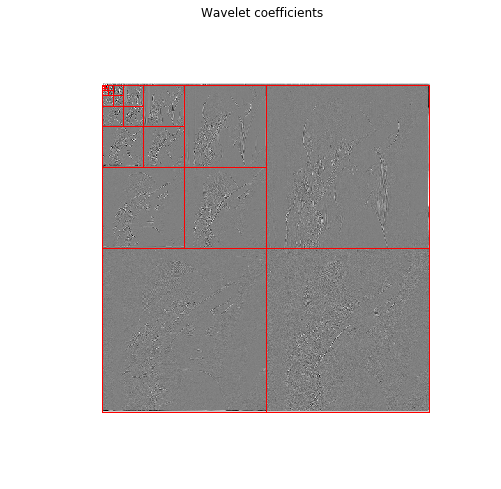

In [16]:
plt.figure(figsize = (8,8))

plot_wavelet(fW, Jmin)
plt.title('Wavelet coefficients')

plt.show()

__Exercise 4__

Compute a best $M$-term approximation in the wavelet basis of $f$, for
$M \in \{N/100, N/20\}$. Compute the approximation using
a well chosen hard threshold value $T$.
Note that the inverse wavelet transform is obtained by replacing the +1
by a -1 in the definition of the transform.

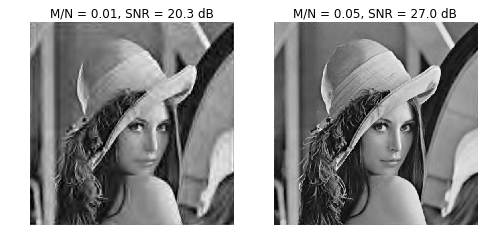

In [17]:
run -i nt_solutions/coding_1_approximation/exo4

In [18]:
## Insert your code here.

__Exercise 5__

Compute and display in log-scale the non-linear approximation
error $\epsilon[M]^2$.
Compares the Fourier and wavelets approximations.
Store the values of $\epsilon[M]^2$ in a vector $err\_wav$.

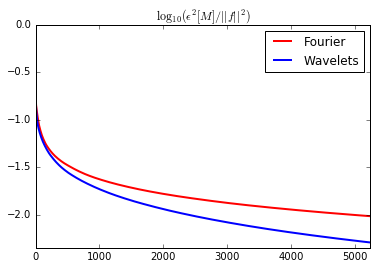

In [19]:
run -i nt_solutions/coding_1_approximation/exo5

In [20]:
## Insert your code here

Cosine Approximation
--------------------
The discrete cosine approximation (DCT) is similar to the Fourier
approximation, excepted that it used symmetric boundary condition instead
of periodic boundary condition, and is thus more useful to approximate
image.


A 1-D cosine atom of $n$ sample is defined as
$$ \bar\psi_m(x) = \frac{1}{\sqrt{N}} \cos\pa{ \frac{2\pi}{N} (x-1/2) m } $$
A 2-D cosine atom is obtained by tensor product of 1-D atoms
$$ \psi_{m_1,m_2}(x_1,x_2) = \bar\psi_{m_1}(x_1) \bar\psi_{m_2}(x_2). $$
On the contrary to the Fourier 2-D atoms, these 2-D DCT atoms are not
oriented (they contains 4 Fourier frequencies).


The set of inner products $ \{ \dotp{f}{\psi_m} \}_m $ is computed in
$O(N \log(N))$ operations with the 2-D Fast Cosine Transform
algorithm.

In [11]:
function dct2(l)
    return transpose(dct(transpose(dct(l))))
end

function idct2(l)
    return transpose(idct(transpose(idct(l))))
end

fC = dct2(f)

#transpose(dct(transpose(dct(f))))

512×512 Array{Float32,2}:
  0.573204     0.807158     0.813079    …  -0.0415991   -0.0626428  
  0.81037      1.1473       1.14477        -0.0658219   -0.109625   
  0.810531     1.1411       1.14998        -0.0578622   -0.0874247  
  0.810392     1.14793      1.14416        -0.0685576   -0.11214    
  0.81         1.13909      1.15065        -0.0505661   -0.080779   
  0.81192      1.15418      1.141       …  -0.112154    -0.138372   
  0.811181     1.14167      1.14856        -0.191372    -0.113611   
  0.798783     1.13588      1.12843        -0.123683    -0.0773938  
  0.793725     1.12219      1.1193         -0.0668308   -0.0465327  
  0.786885     1.09866      1.12165        -0.0755394   -0.0283598  
  0.787886     1.11579      1.11301     …  -0.0545468   -0.0350828  
  0.787793     1.10947      1.11447        -0.0276566   -0.0068657  
  0.793583     1.11795      1.12121        -0.0520813   -0.00910003 
  ⋮                                     ⋱   ⋮                       
 -0.0169

Display the magnitude of the DCT coefficients.
Note that the low frequencies are in the upper-left corner.

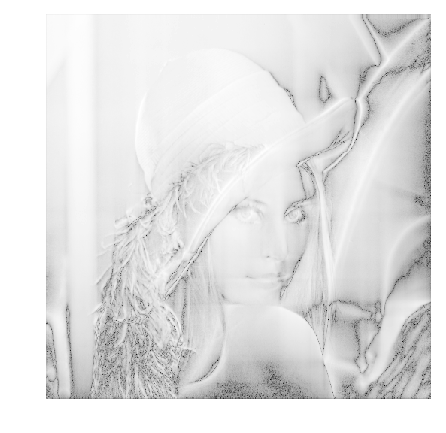

In [12]:
figure(figsize = (5,5))
imageplot(log(1e-5 + abs(fC))) # A vérifier, l'image n'est pas la même.

__Exercise 6__

Compute a best $M$-term approximation in the wavelet basis of $f$, for
$M \in \{N/100, N/20\}$. Compute the approximation using
a well chosen hard threshold value $T$. Note that the inverse DCT
transform is obtained with the function idct.

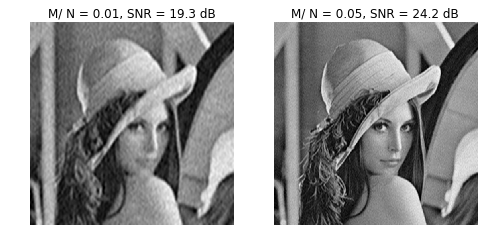

In [23]:
run -i nt_solutions/coding_1_approximation/exo6

In [24]:
## Insert your code here.

__Exercise 7__

Compute and display in log-scale the non-linear approximation
error $\epsilon[M]^2$.
Compares the Fourier and DCT approximations.
Store the values of $\epsilon[M]^2$ in a vector $err\_dct$.

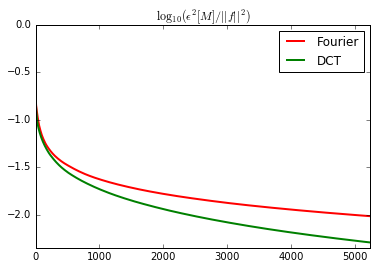

In [25]:
run -i nt_solutions/coding_1_approximation/exo7

In [26]:
## Insert your code here.

Local Cosine Approximation
--------------------------
To improve the global DCT approximation, one can approximate
independantly small patches in the image. This corresponds to a
decomposition in a local cosine basis, which is at the heart
of the JPEG image compression standard.


The only parameter of the transform is the size of the square.

In [13]:
w = 16

16

Initialize at zero the transformed image in the local DCT basis.

In [14]:
fL = zeros(n, n)

512×512 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

Example of patch index.

In [15]:
i = 5
j = 7

7

For a given path index $(i,j)$, we extract a $(w,w)$ patch.

In [16]:
P = f[(i-1)*w: i*w, (j-1)*w: j*w] #Indices à vérifier.

17×17 Array{Float32,2}:
 0.415888  0.397196  0.425234  0.392523  …  0.457944  0.448598  0.471963
 0.392523  0.411215  0.415888  0.415888     0.439252  0.448598  0.448598
 0.383178  0.420561  0.420561  0.415888     0.434579  0.471963  0.462617
 0.38785   0.406542  0.420561  0.392523     0.406542  0.443925  0.457944
 0.397196  0.383178  0.415888  0.425234     0.429907  0.434579  0.476636
 0.406542  0.411215  0.420561  0.415888  …  0.453271  0.453271  0.457944
 0.397196  0.425234  0.415888  0.406542     0.443925  0.462617  0.443925
 0.383178  0.401869  0.411215  0.401869     0.434579  0.462617  0.462617
 0.397196  0.425234  0.401869  0.406542     0.439252  0.443925  0.453271
 0.406542  0.415888  0.392523  0.401869     0.453271  0.443925  0.453271
 0.415888  0.383178  0.397196  0.406542  …  0.443925  0.439252  0.439252
 0.406542  0.415888  0.38785   0.397196     0.443925  0.457944  0.443925
 0.420561  0.401869  0.383178  0.406542     0.439252  0.453271  0.420561
 0.397196  0.406542  0.4018

Compute the Cosine transform of the patch using the fast DCT algorithm.

In [17]:
fL[(i-1)*w: i*w, (j-1)*w: j*w] = dct2(P) #Indices à vérifier.

17×17 Array{Float32,2}:
 0.425136   0.574692   0.581315   …  0.191466   0.124005    0.0791124 
 0.578068   0.808378   0.824071      0.25826    0.176626    0.095594  
 0.546422   0.812091   0.809624      0.257355   0.196537    0.0876981 
 0.539528   0.782058   0.800694      0.233116   0.198554    0.0961766 
 0.537758   0.741205   0.75108       0.232813   0.174933    0.111877  
 0.519087   0.7299     0.726378   …  0.25058    0.163466    0.0904007 
 0.487155   0.714248   0.705702      0.206788   0.149958    0.0532923 
 0.446582   0.645597   0.649141      0.210903   0.160234    0.0723702 
 0.425311   0.608631   0.597796      0.18354    0.125603    0.0664708 
 0.393664   0.560186   0.535321      0.174498   0.104272    0.0556786 
 0.368598   0.476475   0.463194   …  0.158489   0.100557    0.0405035 
 0.298222   0.446139   0.41497       0.137695   0.0957948   0.032808  
 0.261912   0.371155   0.343765      0.11108    0.0774003   0.017564  
 0.197754   0.287654   0.301988      0.116082   0.053

Display the patch and its coefficients. We removed the low frequency of
$P$ for display purpose only.

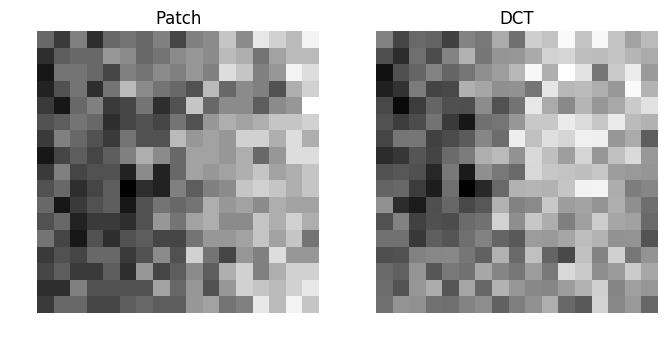

PyObject <matplotlib.text.Text object at 0x00000000224DCF28>

In [18]:
figure(figsize = (8,8))
imageplot(P, "Patch", [1, 2, 1])
imageplot(dct2(P .- mean(P)), "DCT", [1, 2, 2])

__Exercise 8__

Compute the local DCT transform $f_L$ by transforming each patch.

In [33]:
run -i nt_solutions/coding_1_approximation/exo8

In [34]:
## Insert your code here.

Display the coefficients.

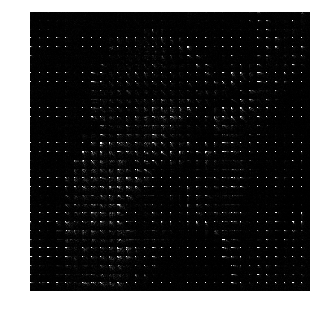

In [35]:
figure(figsize = (5,5))
imageplot(np.clip(abs(fL),0,.005*w*w))

__Exercise 9__

Compute the inverse local DCT transform  of the coefficients $f_L$ by inverse
transforming each patch using  the function idct2.

In [36]:
run -i nt_solutions/coding_1_approximation/exo9

Error |f-f1|/|f| = 2.19156155293e-16


In [37]:
## Insert your code here.

__Exercise 10__

Compute a few best $M$-term approximations in the Local DCT basis of
$f$.

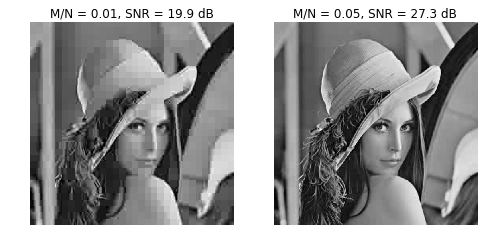

In [38]:
run -i nt_solutions/coding_1_approximation/exo10

In [39]:
## Insert your code here.

__Exercise 11__

Compute and display in log-scale the non-linear approximation
error $\epsilon[M]^2$.
Store the values of $\epsilon[M]^2$ in a vector |err_ldct|.
Compares the Fourier, Wavelets, DCT and local-DCT approximations.

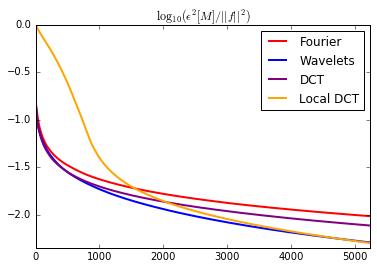

In [40]:
run -i nt_solutions/coding_1_approximation/exo11

In [41]:
## Insert your code here.

Comparison of Wavelet Approximations of Several Images
------------------------------------------------------
An image is more complicated than an other one for a given orthogonal
basis if its approximation error decays more slowly.


First load several high resolution images.

In [7]:
n = 512
fList = zeros(n, n, 4)
fList[: , : , 1] = rescale(load_image("NtToolBox/src/data/regular3.png", n))
fList[: , : , 2] = rescale(load_image("NtToolBox/src/data/phantom.png", n))
fList[: , : , 3] = rescale(load_image("NtToolBox/src/data/lena.png", n))
fList[: , : , 4] = rescale(load_image("NtToolBox/src/data/mandrill.png", n))


512×512 Array{Float32,2}:
 0.630435   0.23913    0.208696   0.382609  …  0.486957  0.665217   0.769565 
 0.504348   0.43913    0.169565   0.291304     0.56087   0.643478   0.543478 
 0.330435   0.495652   0.2        0.2          0.434783  0.382609   0.352174 
 0.304348   0.586957   0.413043   0.208696     0.313044  0.326087   0.3      
 0.373913   0.526087   0.569565   0.213043     0.256522  0.343478   0.369565 
 0.352174   0.326087   0.686957   0.26087   …  0.369565  0.656522   0.786957 
 0.186957   0.221739   0.578261   0.56087      0.804348  0.856522   0.713044 
 0.143478   0.221739   0.482609   0.665217     0.7       0.521739   0.6      
 0.247826   0.208696   0.23913    0.504348     0.582609  0.678261   0.526087 
 0.16087    0.134783   0.208696   0.278261     0.282609  0.352174   0.591304 
 0.143478   0.186957   0.243478   0.156522  …  0.282609  0.317391   0.295652 
 0.143478   0.2        0.334783   0.156522     0.382609  0.321739   0.321739 
 0.152174   0.3        0.386957   0.27

Display them.

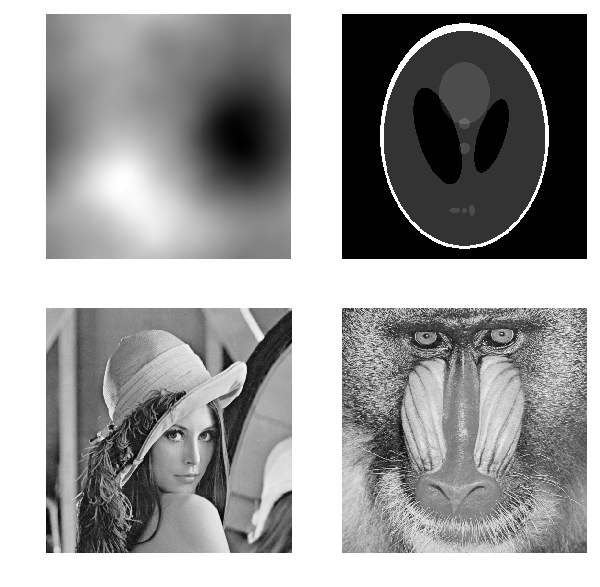

In [9]:
figure(figsize = (7,7))

for i in 1:4
    imageplot(fList[: , : , i], "", [2, 2, i])
end

__Exercise 12__

Compare the approximation error decay for those images.
Display $ \log_{10}(\norm{f-f_M}) $ as a function of $\log_{10}(M)$.

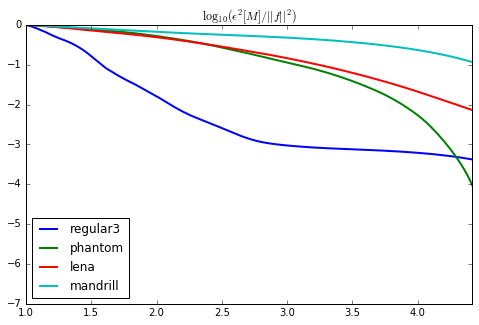

In [44]:
run -i nt_solutions/coding_1_approximation/exo12

In [45]:
## Insert your code here.